<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw6_omc_integral_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to attempt to develop code for omc_integral to approximate the integral

$$\int_{0}^{1}h(x)dx$$

where

$$h(x) = 100*I_{(0,\frac{1}{100}]}(x)+1*I_{(\frac{1}{100},1)}(x)$$

First, import modules. We will need scipy.stats for the convergence rate down the line, and numpy for the random generation.

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [0]:
def omc_integral(n):
    array = np.zeros((n,1))
    for i in range(n):
        y = np.random.uniform()
        if y <= 0.01:
            x = 100
        else:
            x = 1
        array[i] = x
    average = np.mean(array)
    return average

Now, create code to demonstrate convergence rate.

----->>>the convergence order is -0.5139868125446612


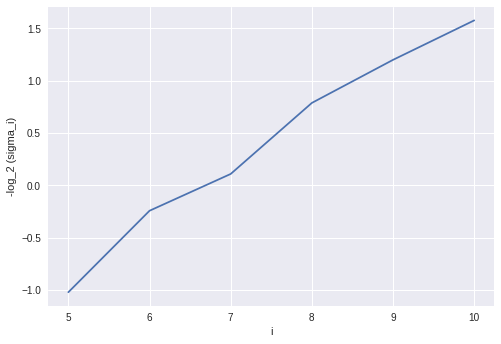

In [63]:
# m is batch number, i_lower and i_upper set bounds of range.
m = 100

# Create main array to store all outputs in.
master_array = np.zeros((m,6))

# Populate array with outputs of omc_integral
for i in range(5,11): #Use 11 as upper bound so range goes to 10
    for j in range(m):
        master_array[j,i-5] = omc_integral(2**i)
        
# With array populated, find standard deviation for each value of i.
stdev_array = np.zeros((6,1))

for i in range(6):
    stdev_array[i,0] = np.std(master_array[:,i])
    
# Now, plot and find the slop for data.
x_var = np.arange(5,11)
y_var = np.zeros(len(x_var))

for i in range(len(stdev_array)):
    y_var[i] = -1*(np.log2(stdev_array[i,0]))
    
plt.plot(x_var,y_var)
plt.xlabel('i')
plt.ylabel('-log_2 (sigma_i)')

out = ss.linregress(x_var,y_var)
print('----->>>the convergence order is ' + str(-out[0]))

From here, simply need to perform the "standard" convergence rate computation using RMSE.

Finding the RMSE involves taking our approximations and comparing them against the true value. Here, the true value is going to be $1.99$ (while the problem says 1.98, this is incorrect as the professor acknowledged in class). I will re-use the RMSE code from the last assignment here.

In [0]:
def rmse_of_vector(predictions, act_vals):
  # Default check: make sure both vectors are same length.
  if len(predictions) == len(act_vals):
    pass
  else:
    return("Inputs are not the same length.")
  # Produce difference between estimates and target values (actual value)
  diff_vector = [predictions[i]-act_vals[i] for i in range(len(predictions))]
  
  # Take square of above values
  diff_square = [diff_vector[i]**2 for i in range(len(diff_vector))]
  
  # Convert to array, find mean.
  diff_array = np.asarray(diff_square)
  diff_mean = diff_array.mean()
  
  # RMSE is square root of above mean value.
  rmse = np.sqrt(diff_mean)
  return rmse

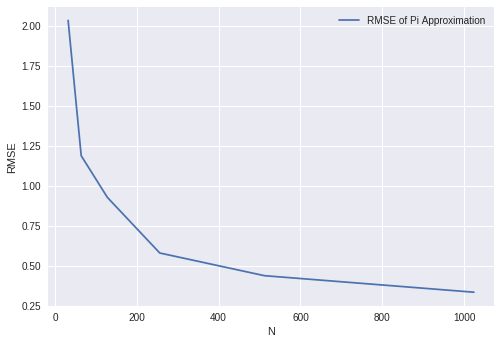

In [67]:
target_vector = []
for i in range(100):
  target_vector.append(1.99)

N_vector = [2**5, 2**6, 2**7, 2**8, 2**9, 2**10]
RMSE_vector = [rmse_of_vector(master_array[:,0],target_vector),
              rmse_of_vector(master_array[:,1],target_vector),
              rmse_of_vector(master_array[:,2],target_vector),
              rmse_of_vector(master_array[:,3],target_vector),
              rmse_of_vector(master_array[:,4],target_vector),
              rmse_of_vector(master_array[:,5],target_vector)]

plt.plot(N_vector,RMSE_vector,label="RMSE of Integral Approximation")
plt.xlabel("N")
plt.ylabel("RMSE")
plt.legend()

As before, use a log-log plot to find the "exact" result from the RMSE.

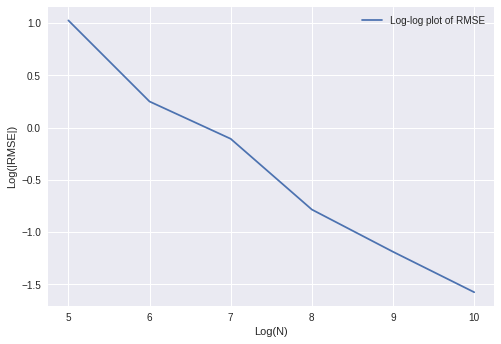

In [68]:
nn = np.log2(N_vector)
yy = np.log2(np.abs(RMSE_vector))

plt.plot(nn,yy,label="Log-log plot of RMSE")
plt.xlabel("Log(N)")
plt.ylabel("Log(|RMSE|)")
plt.legend()

In [69]:
out_2 = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out_2[0]))

----->>>the convergence order is 0.5136757312935791


We can see that this matches the numerically computed convergence order we found above.